# 3 Bifurcations
---

**Overview**

- [3.0 Introduction](#3.0-Introduction)
- [3.1 Saddle-Node Bifurcation](#3.1-Saddle-Node-Bifurcation)
    - [Graphical Conventions](#Graphical-Conventions)
    - [Terminology](#Terminology)
    - [Exmaple 3.1.1](#Exmaple-3.1.1)
    - [Normal Forms](#Normal-Forms)
- [3.2 Transcritical Bifurcation](#3.2-Transcritical-Bifurcation)
    - [Example 3.2.1](#Example-3.2.1)
    - [Example 3.2.2](#Example-3.2.2)
- [3.3 Laser Threshold](#3.3-Laser-Threshold)
    - [Physical Background](#Physical-Background)
    - [Model](#Model)
- [3.4 Pitchfolk Bifurcation](#3.4-Pitchfolk-Bifurcation)
- [3.5 Overdamped Bead on a Rotating Hoop](#3.5-Overdamped-Bead-on-a-Rotating-Hoop)
- [3.6 Imperfect Bifurcation and Catastrophes](#3.6-Imperfect-Bifurcation-and-Catastrophes)
- [3.7 Insect Outbreak](#3.7-Insect-Outbreak)

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
marker = ['o', 'x', 's']

## 3.0 Introduction
---

- **Bifuractions**

## 3.1 Saddle-Node Bifurcation
---

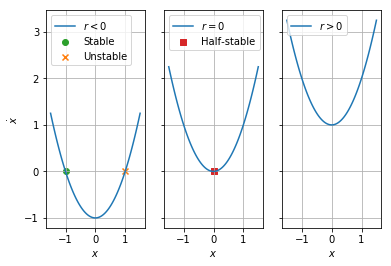

In [32]:
def f(x, r):
    y = r + x**2
    return y

x = np.linspace(-1.5, 1.5, 100)

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, sharey=True)

ax0.plot(x, f(x, -1), label=r'$r<0$')
ax0.scatter(-1, f(-1, -1), label='Stable', c=c[2], marker=marker[0])
ax0.scatter(1, f(1, -1), label='Unstable', c=c[1], marker=marker[1])
ax0.set(xlabel=r'$x$', ylabel=r'$\dot{x}$')
ax0.grid(True)
ax0.legend(loc='upper left')

ax1.plot(x, f(x, 0), label=r'$r=0$')
ax1.scatter(0, f(0, 0), label='Half-stable', c=c[3], marker=marker[2])
ax1.set(xlabel=r'$x$')
ax1.grid(True)
ax1.legend(loc='upper left')

ax2.plot(x, f(x, 1), label=r'$r>0$')
ax2.set(xlabel=r'$x$')
ax2.grid(True)
ax2.legend(loc='upper left')

plt.show()

### Graphical Conventions

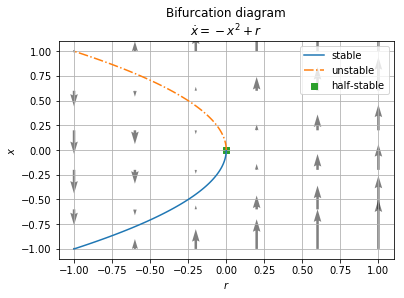

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, r):
    y = - x**2 + r
    return y

def g(x, r):
    y = x**2 + r
    return y

x = np.linspace(-1, 0, 100)
y = f(x, 0)
plt.plot(y, x, label='stable')

x = np.linspace(0, 1, 100)
y = f(x, 0)
plt.plot(y, x, label='unstable', linestyle='-.')

X, Y = np.meshgrid(np.arange(-1, 1.2, 0.4), np.arange(-1, 1.2, 0.4))
# U, V = np.meshgrid(X, Y)
plt.quiver(Y, X, np.repeat(0, len(X)*len(Y)), g(X, Y), alpha=.5)

plt.scatter(0, 0, marker='s', label='half-stable', color='#2ca02c')

plt.title('Bifurcation diagram\n' r'$\dot{x} = - x^2 + r$')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.legend(loc='best')
plt.grid(True)

plt.show()

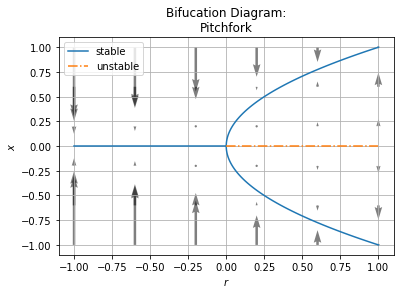

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def f(x, r):
    y = - x**3 + x*r
    return y

# def fixed(x):
#     if x == 0:
#         r = 0
#     elif x != 0:
#         r = x**2
    
#     return r


X, Y = np.meshgrid(np.arange(-1, 1.1, 0.4), np.arange(-1, 1.1, 0.4))

plt.quiver(Y, X, np.repeat(0, len(X)*len(Y)), f(X, Y), color='k', alpha=0.5)

x = np.linspace(-1, 1, 100)

plt.plot(x**2, x, label='stable')

r = np.linspace(0, 1, 100)

plt.plot(-r, np.repeat(0, len(r)), label='stable', color='#1f77b4')
plt.plot(r, np.repeat(0, len(r)), label='unstable', linestyle='-.')

plt.title('Bifucation Diagram:\nPitchfork')
plt.xlabel(r'$r$')
plt.ylabel(r'$x$')
plt.grid(True)
plt.legend(loc='best')

plt.show()

### Terminology

Saddle-node bifurcation 
aka, **Fold bifurcation**, **Tuning-point bifurcation**, **Blue sky bifurcation**

### Exmaple 3.1.1

linear stability analysis of fixed point: $\dot{x} = f(x) = r - x^2$

### Example 3.1.2

$$\dot{x} = r - x - e^{-x}$$

**Solution:**


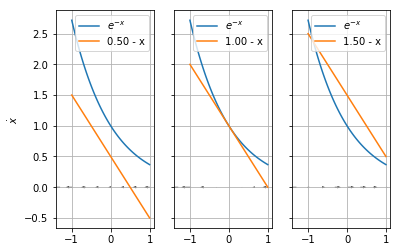

In [61]:
def f(x, r):
    y = r - x - np.exp(-x)
    return y

def f_1(x):
    y = np.exp(-x)
    return y

def f_2(x, r):
    y = r - x
    return y

r = np.linspace(0.5, 1.5, 3)
x = np.linspace(-1, 1, 100)
x_flow = np.linspace(-1.3, 1, 8)

# fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, sharey=True)
fig, axes = plt.subplots(ncols=3, sharey=True)

for i in range(3):
    axes[i].plot(x, f_1(x), label=r'$e^{-x}$')
    axes[i].plot(x, f_2(x, r[i]), label = (r'%.2f - x' % r[i]))
    axes[i].quiver(x_flow, 0, f(x_flow, r[i]), 0)
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

axes[0].set(ylabel=r'$\dot{x}$')
# axes[1].title(r'$\dot{x} = r - x - e^{-x}$')
plt.show()

### Normal Forms

$$\begin{align*}
\dot{x} 
&= r - x - e^{-x} \\
&= r - x - [1 - x + \frac{x^2}{2!} + \cdots] \\
&= (r - 1) - \frac{x^2}{2} + \cdots 
\end{align*}$$

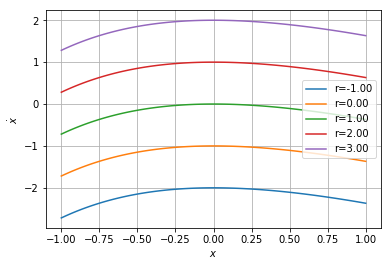

In [65]:
def f(x, r):
    y = r - x - np.exp(-x)
    return y

x = np.linspace(-1, 1, 100)
r = np.linspace(-1, 3, 5)

for i in range(5):
    plt.plot(x, f(x, r[i]), label=('r=%.2f' % r[i]))

plt.grid(True)
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot{x}$')
plt.legend(loc='best')
plt.show()

## 3.2 Transcritical Bifurcation
---

$$\dot{x} = rx - x^2$$
(1)


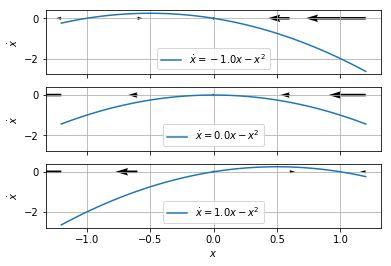

In [84]:
def f(x, r):
    y = r*x - x**2
    return y

x = np.linspace(-1.2, 1.2, 100)
r = np.linspace(-1, 1, 3)
x_flow = np.linspace(-1.2, 1.2, 5)

fig, axes = plt.subplots(nrows=3, sharex=True, sharey=True)

for i in range(3):
    axes[i].plot(x, f(x, r[i]), label=(r'$\dot{x} = %.1f x - x^2$' % r[i]))
    axes[i].quiver(x_flow, 0, f(x_flow, r[i]), 0)
    axes[i].set(ylabel=r'$\dot{x}$')
    axes[i].grid(True)
    axes[i].legend(loc='lower center')
    
axes[2].set(xlabel=r'$x$')
plt.show()

In [85]:
def fixed(r):
    if r < 0:
        sta = 0
        uns = r
    elif r >= 0:
        sta = r
        uns = 0
    
    return sta, uns

r = np.linspace(-1, 1, 100)

sta, uns = fixed(r)

plt.plot(r, sta, linestyle='-', c=c[2], label='Stable')
plt.plot(r, uns, linestyle='-.', c=c[1], label='Unstable')
plt.xlabel(r'r')
plt.ylabel(r'x')
plt.legend(loc='best')

plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Example 3.2.1

$$\dot{x} = x(1-x^2) - a(1-e^{-bx})$$

**Solution:**

for small x $dx$
$$
\begin{align*}
1 - e^{-bx} 
&= 1 - [1 - bx + \frac{1}{2}b^2x^2 + O(x^3)] \\
&= bx - \frac{1}{2} b^2x^2 + O(x^3)
\end{align*}
$$

substitute: $1 - e^{-bx}$
$$
\begin{align*}
\dot{x}
&= x - a(bx - \frac{1}{2}b^2x^2) + O(x^3) \\
&= (1 - ab)x + (\frac{1}{2}ab^2) x^2 + O(x^3)
\end{align*}
$$

fixed point $x*$:
$$x* \approx \frac{2(ab -1)}{ab^2}$$

### Example 3.2.2

Analyze: 
$$\dot{x} = r \ln x + x -1$$ 
near $x=1$

find $X$, $R$, approximate form 
$$\dot{X} \approx RX - X^2$$

**Solution:**

fixe point: $x=1$ 

introduce new var: $u = x -1$

$$
\begin{align*}
\dot{u} 
&= \dot{x} \\
&= r \ln (1+u) + u \\
&= r \Big[ u - \frac{1}{2}u^2 + O(u^3) \Big] + u \\
&\approx (r + 1) u - \frac{1}{2}ru^2 + O(u^3) 
\end{align*}
$$

Let $u = av$

$$\dot{v} = (r+1)v - (\frac{1}{2}ra)v^2 + O(v^3)$$

if choose $a = \frac{2}{r}$

$$\dot{v} = (r+1)v - v^2 + O(v^3)$$

Let $R = r+1$, $X = v$

$$X = v = \frac{u}{a} = \frac{1}{2} r(x-1)$$

## 3.3 Laser Threshold

### Physical Background

solid-state laser

### Model

$n(t)$: \# of photons 

$$\begin{align*}
\dot{n} 
&= \text{gain} - \text{loss} \\
&= Gn N - kn
\end{align*}$$

- $N(t)$: \# of excited atoms
- $G (>0)$: gain coef
- $k (>0)$: rate constant; 
- $\tau = \frac{1}{k}$: lifetime of photon in laser

$$N(t) = N_0 - \alpha n$$
- $\alpha$: rate at which atoms drop back to graund state

Substitute: 
$$
\begin{align*}
\dot{n} &= Gn(N_0 - \alpha n) - kn \\
&= (GN_0 - k) n - \alpha G n^2
\end{align*}
$$

In [98]:
def f(n, N_0, G, k, alpha):
    n_dot = (G * N_0 - k)* n - alpha * G * n**2
    
    return n_dot

N_0s = np.array([25, 50, 100])
G = 0.01
k = 0.5
alpha = 50

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True)
n = np.linspace(0, 1.5, 100)
n_flow = np.linspace(0, 1.5, 4)
for i in range(3):
    N_0 = N_0s[i]
    n_dot = f(n, N_0, G, k, alpha)
    n_dot_flow = f(n_flow, N_0, G, k, alpha)
    axes[i].plot(n, n_dot, label=(r'$N_0 = %d $' % N_0s[i]))
    axes[i].quiver(n_flow, 0, n_dot, 0, color=c[2])
    axes[i].legend(loc='lower left')
    axes[i].grid(True)
    
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

## 3.6 Imperfect Bifurcation and Catastrophes
---

$$\dot{x} = h + rx + x^3$$

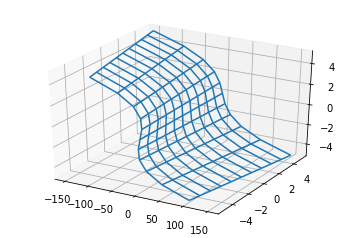

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def fixed(x, r):
    h = - r*x - x**3
    return h

x, r = np.arange(-5, 5.01, 1), np.arange(-5, 5.01, 1)
x, r = np.meshgrid(x, r)
h = fixed(x, r)

fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot_surface(h, r, x)
ax.plot_wireframe(h, r, x)

# Axes3D.plot_wireframe(X, Y, Z)
plt.show()

# print(X)
# print(Y)
# print(Z)

---
**Overview**

- [3.0 Introduction](#3.0-Introduction)
- [3.1 Saddle-Node Bifurcation](#3.1-Saddle-Node-Bifurcation)
    - [Graphical Conventions](#Graphical-Conventions)
    - [Terminology](#Terminology)
    - [Exmaple 3.1.1](#Exmaple-3.1.1)
    - [Normal Forms](#Normal-Forms)
- [3.2 Transcritical Bifurcation](#3.2-Transcritical-Bifurcation)
    - [Example 3.2.1](#Example-3.2.1)
    - [Example 3.2.2](#Example-3.2.2)
- [3.3 Laser Threshold](#3.3-Laser-Threshold)
    - [Physical Background](#Physical-Background)
    - [Model](#Model)
- [3.4 Pitchfolk Bifurcation](#3.4-Pitchfolk-Bifurcation)
- [3.5 Overdamped Bead on a Rotating Hoop](#3.5-Overdamped-Bead-on-a-Rotating-Hoop)
- [3.6 Imperfect Bifurcation and Catastrophes](#3.6-Imperfect-Bifurcation-and-Catastrophes)
- [3.7 Insect Outbreak](#3.7-Insect-Outbreak)